In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk import word_tokenize
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\izzaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\izzaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
validation=pd.read_csv("C:/Users/izzaa/Downloads/archive(10)/twitter_validation.csv",header=None)
train=pd.read_csv("C:/Users/izzaa/Downloads/archive(10)/twitter_training.csv",header=None)
train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
train.columns = ['id', 'information', 'type', 'text']
validation.columns = ['id', 'information', 'type', 'text']


In [16]:
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [17]:
validation.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [18]:
train_df=train
validation_df=validation

In [20]:
import re
train_df["lower"]=train_df.text.str.lower()
train_df["lower"]=[str(data) for data in train_df.lower]
train_df["lower"]=train_df.lower.apply(lambda x:re.sub('[^A-Za-z0-9]+',' ',x))

In [21]:
validation_df["lower"]=validation_df.text.str.lower()
validation_df["lower"]=[str(data) for data in validation_df.lower]
validation_df["lower"]=validation_df.lower.apply(lambda x:re.sub('[^A-Za-z0-9]+',' ',x))

In [22]:
train_df.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


Text(0.5, 1.0, 'Distribution of tweets')

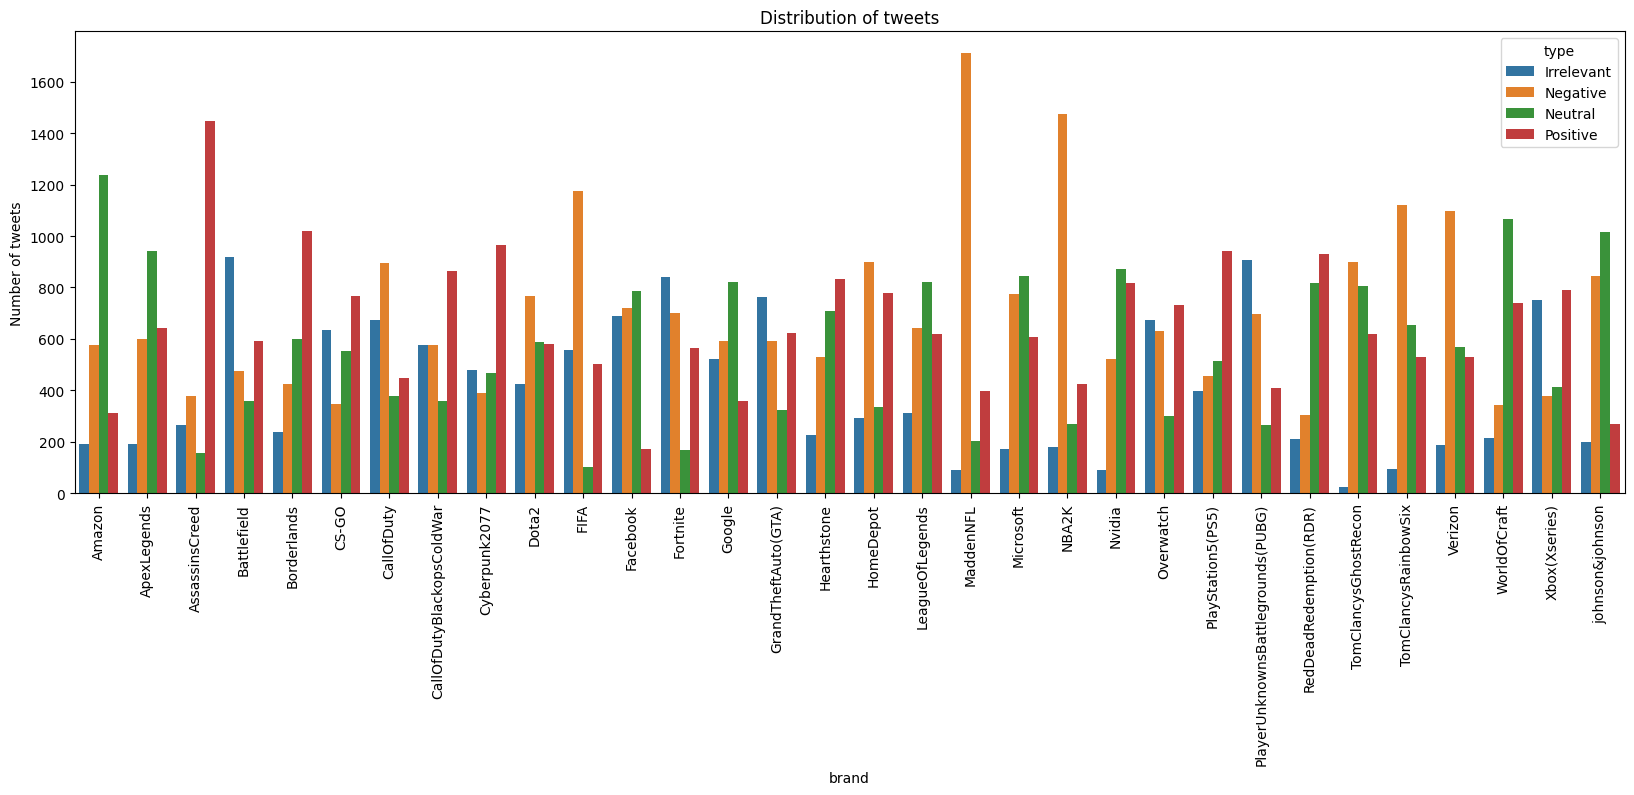

In [24]:
info_type=train.groupby(by=["information","type"]).count().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(data=info_type,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("brand")
plt.ylabel("Number of tweets")
plt.title("Distribution of tweets")

In [29]:
import nltk
nltk.download('punkt_tab')  # Download the punkt tokenizer

from nltk.tokenize import word_tokenize

# Assuming `train_df['column_name']` contains the text data
tokens_text = [word_tokenize(str(word).lower()) for word in train_df.lower]


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\izzaa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [30]:
tokens_text

[['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['i',
  'am',
  'coming',
  'to',
  'the',
  'borders',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'coming',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  '2',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'me',
  'all'],
 ['im',
  'getting',
  'into',
  'borderlands',
  'and',
  'i',
  'can',
  'murder',
  'you',
  'all'],
 ['so',
  'i',
  'spent',
  'a',
  'few',
  'hours',
  'making',
  'something',
  'for',
  'fun',
  'if',
  'you',
  'don',
  't',
  'know',
  'i',
  'am',
  'a',
  'huge',
  'borderlands',
  'fan',
  'and',
  'maya',
  'is',
  'one',
  'of',
  'my',
  'favorite',
  'characters',
  'so',
  'i',
  'decided',
  'to',
  'make',
  'myself',
  'a',
  'wallpaper',

In [31]:
stopwords_nltk=nltk.corpus.stopwords
stop_words=stopwords_nltk.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
bow_counts=CountVectorizer(tokenizer=word_tokenize,stop_words=stop_words,ngram_range=(1,1))


In [39]:
reviews_test,reviews_train=train_test_split(train_df, test_size=0.30, random_state=42)


In [40]:
x_train_bow=bow_counts.fit_transform(reviews_train.lower)
x_test_bow=bow_counts.transform(reviews_test.lower)

C:\Users\izzaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\izzaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [41]:
y_train_bow=reviews_train['type']
y_test_bow=reviews_test['type']

In [47]:
Logistic_reg=LogisticRegression(C=1,solver='liblinear',max_iter=200)
Logistic_reg.fit(x_train_bow,y_train_bow)
test_pred=Logistic_reg.predict(x_test_bow)
print("Accuracy:",accuracy_score(y_test_bow,test_pred))

Accuracy: 0.74005776919104


In [49]:
x_val_bow=bow_counts.transform(validation_df.lower)
y_val_bow=validation_df["type"]

In [50]:
y_val_bow

0      Irrelevant
1         Neutral
2        Negative
3        Negative
4         Neutral
          ...    
995    Irrelevant
996    Irrelevant
997      Positive
998      Positive
999       Neutral
Name: type, Length: 1000, dtype: object

In [51]:
val_res=Logistic_reg.predict(x_val_bow)
print("Accuracy:",accuracy_score(y_val_bow,val_res))

Accuracy: 0.848
